In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as py
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import figure
import math
%matplotlib notebook

In [120]:
df=pd.read_csv('train/7554/SimpleTest/15.csv')
df.drop([len(df)-2,len(df)-1] , inplace=True)
df

,X,Y,Pressure,TiltX,TiltY,Time
0,767.864187550525,418.978635,0.045884,-5178.0,2279.0,00:03.4174525
1,768.759441044,418.820649,0.045884,-5178.0,2279.0,00:03.4330757
2,769.391384686453,418.820649,0.060044,-5178.0,2279.0,00:03.4488039
3,770.707933941564,418.820649,0.118151,-5178.0,2279.0,00:03.4644607
4,771.181891673403,419.136621,0.180407,-5178.0,2279.0,00:03.4799573
...,...,...,...,...,...,...
644,580.176925742002,353.835778,0.632074,-3891.0,1408.0,00:18.0949448
645,580.071601801594,354.467721,0.632074,-3891.0,1408.0,00:18.1105679
646,579.966277861185,356.100243,0.632074,-3891.0,1408.0,00:18.1105679
647,579.913615890981,356.942834,0.629877,-3891.0,1408.0,00:18.1419729


In [121]:
df.rename(columns = {'X':'X', ' Y':'Y' ,' Pressure':'Pressure' , ' TiltX':'TiltX' , ' TiltY':'TiltY' , ' Time': 'Time'}, inplace = True)

In [122]:
df['X']=df['X'].astype(float)
df['Time']=df['Time'].str.slice(3).astype(float)
df['Time_Diff'] = df['Time'].diff()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          649 non-null    float64
 1   Y          649 non-null    float64
 2   Pressure   649 non-null    float64
 3   TiltX      649 non-null    float64
 4   TiltY      649 non-null    float64
 5   Time       649 non-null    float64
 6   Time_Diff  648 non-null    float64
dtypes: float64(7)
memory usage: 40.6 KB


In [124]:
df['X_Diff'] = df['X'].diff()
df['Y_Diff'] = df['Y'].diff()
df['Slope'] = df['Y_Diff']/df['X_Diff']

<IPython.core.display.Javascript object>


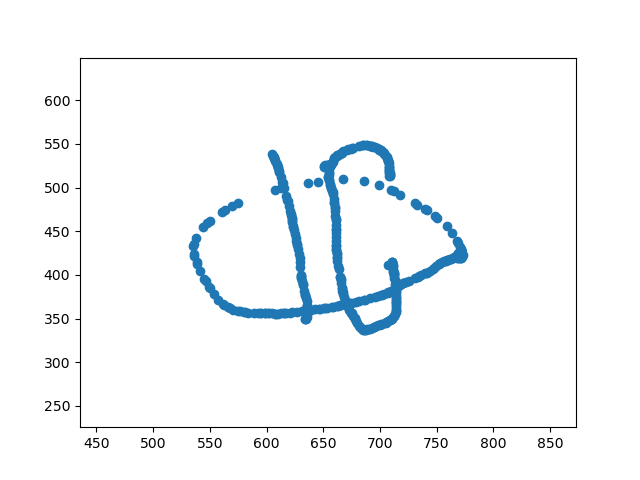

In [125]:
x = df['X']
y = df['Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df['Y'].min()-100 , df['Y'].max() + 100)
graph, = plt.plot([], [], 'o')
graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(df), interval=10)
plt.show()

In [126]:
def line_length(dist):
    dist = np.array(dist)
    return np.sum(dist)

In [127]:
def avg_pressure(pressures):
    pressures = np.array(pressures)
    return np.average(pressures)

In [128]:
def info(dataframe):
    table = dataframe[['X','Y']].copy()
    distances = []
    pressures = []
    lines_data = []
    avg_pressure
    handlift=0
    for i in range(len(table)-1):
        distance = math.sqrt(math.pow((dataframe['X'][i]-dataframe['X'][i+1]),2)
                                   + math.pow((dataframe['Y'][i]-dataframe['Y'][i+1]),2))
        distances.append(distance)
        pressures.append(dataframe['Pressure'][i])
        if ((distance > 15) and (dataframe['Time_Diff'][i+1]-dataframe['Time_Diff'][i]>0.04)):
            lines_data.append((line_length(distances), avg_pressure(pressures)))
            distances = []
            pressures = []
        if (dataframe['Time_Diff'][i+1]-dataframe['Time_Diff'][i]>0.04):
            handlift = handlift+1
    if (distances is not(None) and pressures is not(None)):
         lines_data.append((line_length(distances), avg_pressure(pressures)))
    return handlift, lines_data, len(lines_data)

# Number of hand lifts
# Number of lines and average pressure

In [129]:
hand_lift, lines_d, num_of_lines = info(df)
print('Hand Lifts: ' + str(hand_lift) + "\nNumber Of Lines: " + str(num_of_lines))
print("Lines Length:")
print(lines_d)

Hand Lifts: 5
Number Of Lines: 6
Lines Length:
[(772.867516378659, 0.610017074433006), (419.2851293872124, 0.4988786885371575), (273.56129692483097, 0.4601450443945146), (397.79943906567655, 0.36665961568085653), (209.89441412901564, 0.40830024396595754), (367.56293723651254, 0.5288741930116038)]


# We will check if the shape is closed or open:

In [141]:
index=2
while index<len(df)-1 and (df['Time_Diff'][index+1]-df['Time_Diff'][index] <=0.04):
    index = index + 1

In [143]:
sub_df = df.iloc[1:index+1].copy()
xy_sub_df = sub_df[['X','Y']].copy()
xy_sub_df

,X,Y
1,768.759441,418.820649
2,769.391385,418.820649
3,770.707934,418.820649
4,771.181892,419.136621
5,771.655849,418.978635
...,...,...
157,771.287216,427.983832
158,771.497863,428.141818
159,771.497863,428.141818
160,771.497863,428.141818


In [144]:
df_xy = df[['X','Y']].copy()
for i in range(len(df_xy)-2):
    if df_xy['X'][i] == df_xy['X'][i+1] and df_xy['Y'][i] == df_xy['Y'][i+1] :
        df_xy.drop(i , axis=0 , inplace=True)
for i in range(1,len(xy_sub_df)-2):
    if xy_sub_df['X'][i] == xy_sub_df['X'][i+1] and xy_sub_df['Y'][i] == xy_sub_df['Y'][i+1] :
        xy_sub_df.drop(i , axis=0 , inplace=True)

In [135]:
duplicates = xy_sub_df[xy_sub_df.duplicated()]
df_xy_duplicates = df_xy[df_xy.duplicated()]
df_xy_duplicates

,X,Y


In [145]:
if(len(duplicates)>0):
    print("closed")
else:
    print("open")

closed
